In [1]:
import boost_histogram as bh
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

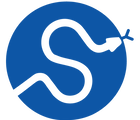

In [2]:
sp = Image.open("SciPy Icon.png")
sp

In [3]:
arr = np.asarray(sp)[:, :, 3]

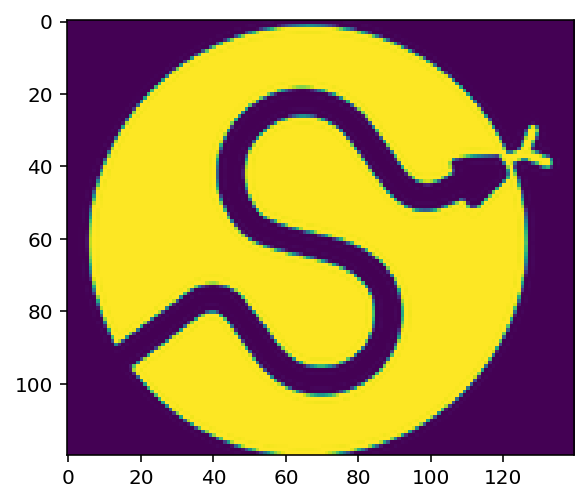

In [4]:
plt.imshow(arr);

In [5]:
x, y, p = np.random.default_rng().random((3, 200_000))

In [6]:
bx = (x * 140).astype(np.int32)
by = (y * 120).astype(np.int32)

In [7]:
# Probibility of hit
prob = arr[by, bx] / 255

# True if hit
hits = prob > p

In [8]:
X = x[hits]
Y = 1 - (y[hits] / 14 * 12 + (1 / 14))

In [9]:
h = bh.Histogram(
    bh.axis.Regular(300, 0, 1, metadata="x"), bh.axis.Regular(300, 0, 1, metadata="y")
)

h.fill(X, Y)

Histogram(
  Regular(300, 0, 1, metadata='x'),
  Regular(300, 0, 1, metadata='y'),
  storage=Double()) # Sum: 110164.0

In [10]:
def plt_h2(h):
    x, y = h.axes.edges
    plt.pcolormesh(x.T, y.T, h.view().T)
    plt.gca().set_aspect("equal", "box")
    plt.xlabel(h.axes[0].metadata)
    plt.ylabel(h.axes[1].metadata)

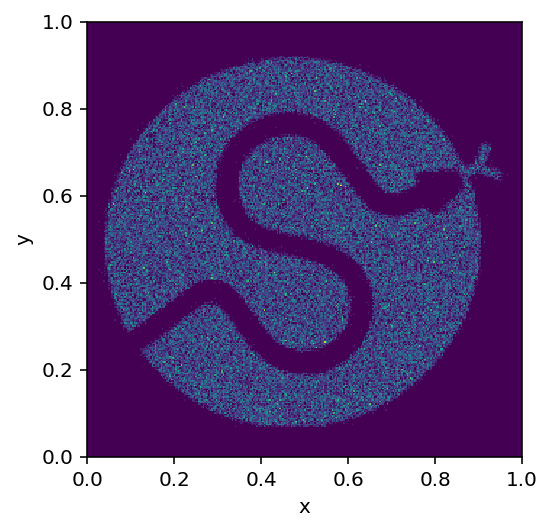

In [11]:
plt_h2(h)

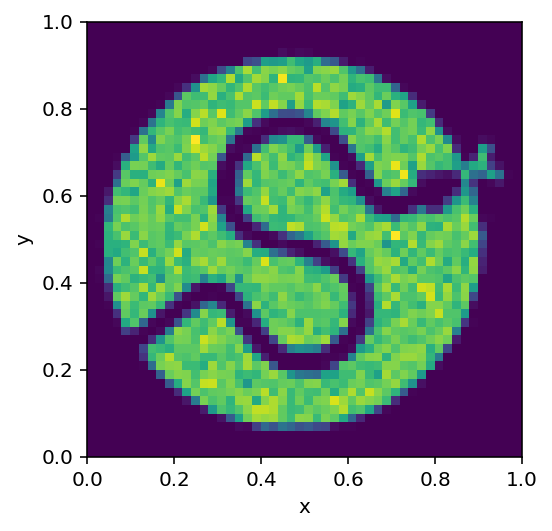

In [12]:
plt_h2(h[:: bh.rebin(6), :: bh.rebin(6)])

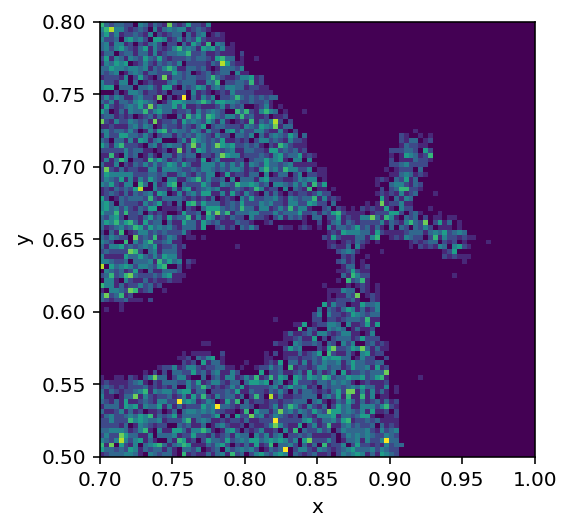

In [13]:
plt_h2(h[bh.loc(0.7) :, bh.loc(0.5) : bh.loc(0.8)])